In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
def logistic(r, x):
    return r * x * (1 - x)
    # return r * ((2*x-1) ** 2 - (2*x-1) ** 4) 

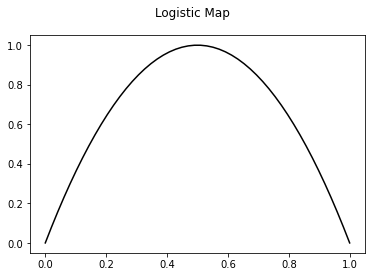

In [3]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(4, x), 'k')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
fig.suptitle('Logistic Map')

fig.savefig('logistic_map.png')

In [4]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

def triangle(r, x):
  return (signal.sawtooth(2 * np.pi * x, 0.5) * r + r) / 8

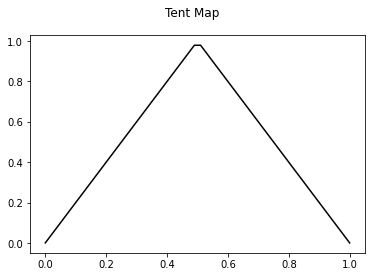

In [5]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, triangle(4, x), 'k')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig.suptitle('Tent Map')

fig.savefig('triangle_map.png')

In [6]:
n = 10000
xmin = 2.5
xmax = 4.0
r = np.linspace(xmin, xmax, n)
iterations = 10000
last = 550
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

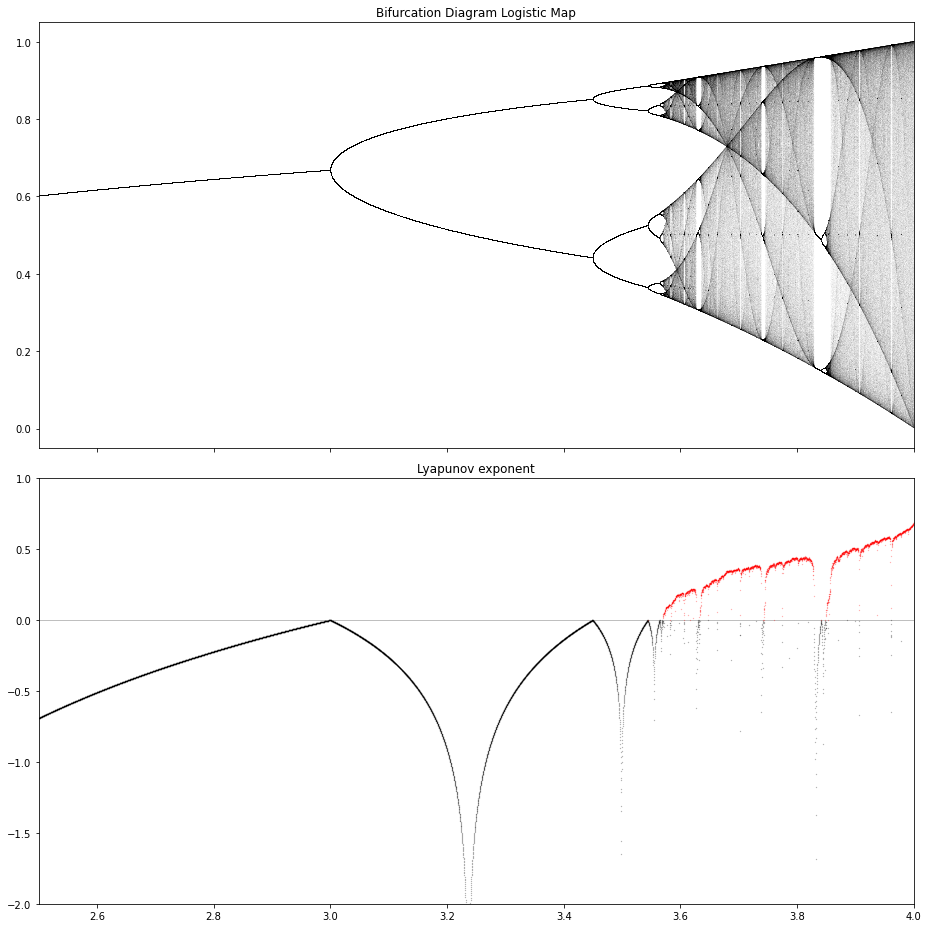

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 13), sharex=True)
plt.rcParams['axes.facecolor'] = 'white'

for i in range(iterations):
    x = logistic(r, x)
    # Compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # Display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.01)
ax1.set_xlim(xmin, xmax)
ax1.set_title("Bifurcation Diagram Logistic Map")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Draw Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Draw Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax1.set_xlim(xmin, xmax)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

fig.savefig('logistic_bifurcation_map.png')

In [8]:
n = 10000
xmin = 2.0
xmax = 4.0
r = np.linspace(xmin, xmax, n)
iterations = 10000
last = 550
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

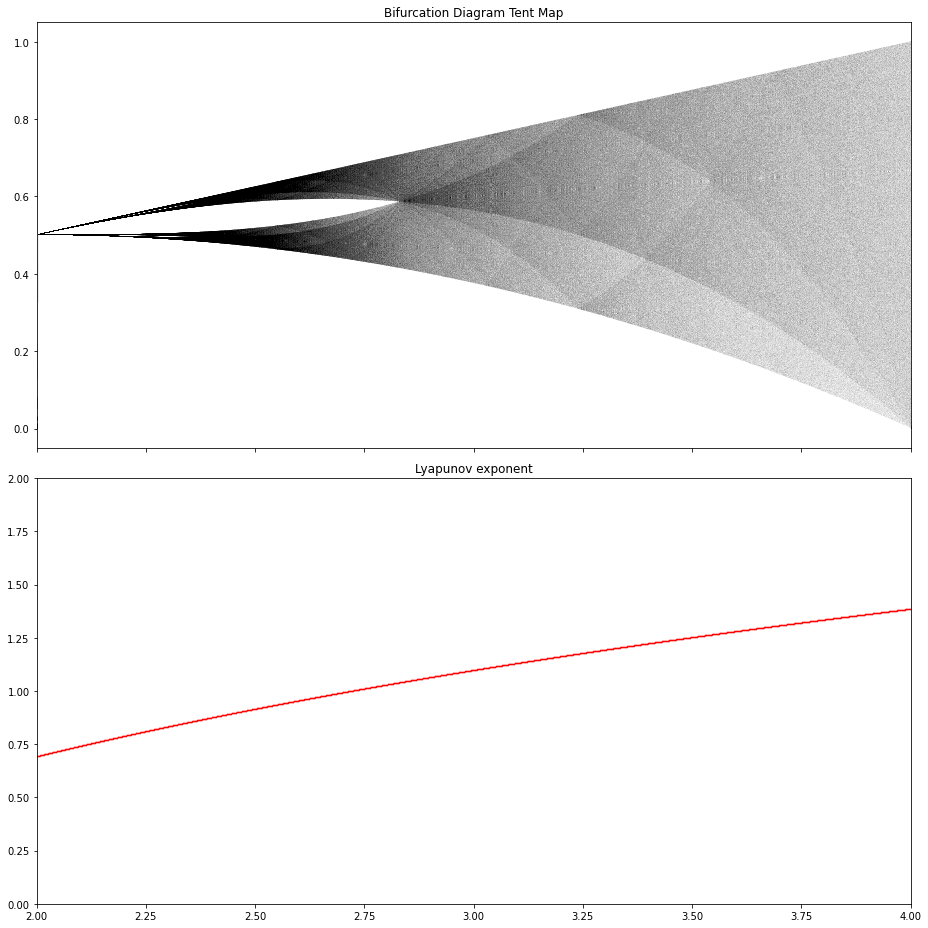

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 13), sharex=True)
plt.rcParams['axes.facecolor'] = 'white'

for i in range(iterations):
    x = triangle(r, x)
    # Compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r))
    # Display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.01)
ax1.set_xlim(xmin, xmax)
ax1.set_title("Bifurcation Diagram Tent Map")

# Display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax1.set_xlim(xmin, xmax)
ax2.set_ylim(0, 2)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

fig.savefig('triangle_bifurcation_map.png')

In [225]:
s = 0.47
def normal(r, x):
    return r * np.exp(-(x-0.5)**2/(2*s**2)) / (np.sqrt(2*np.pi) * s)

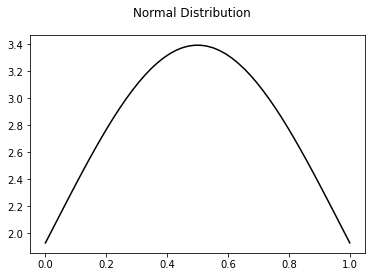

In [226]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, normal(4, x), 'k')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
fig.suptitle('Normal Distribution')

fig.savefig(f"normal_distribution_map_{s}.png")

In [227]:
n = 10000
xmin = 0.1
xmax = 4.0
r = np.linspace(xmin, xmax, n)
iterations = 10000
last = 550
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

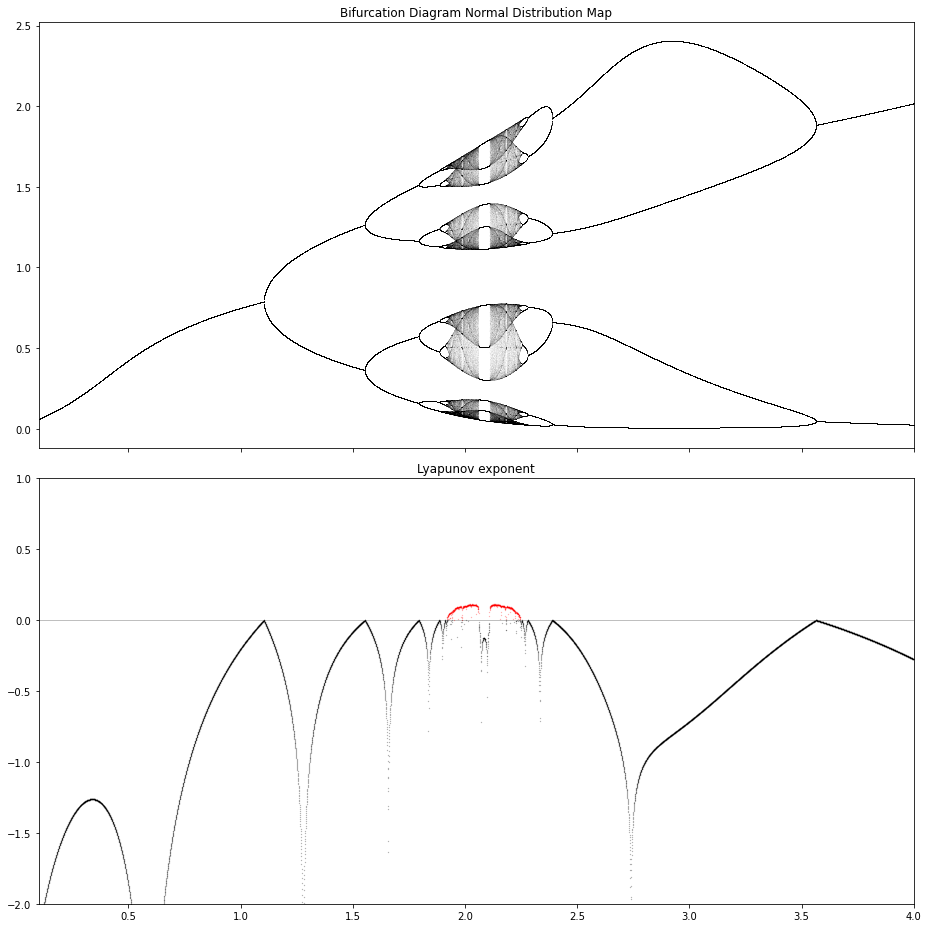

In [228]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 13), sharex=True)
plt.rcParams['axes.facecolor'] = 'white'

for i in range(iterations):
    x = normal(r, x)
    # Compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(-(x-0.5)*normal(r,x)/s ** 2))
    # Display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.01)
ax1.set_xlim(xmin, xmax)
ax1.set_title("Bifurcation Diagram Normal Distribution Map")

# Display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Draw Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Draw Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax1.set_xlim(xmin, xmax)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

fig.savefig(f"normal_distribution_bifurcation_map_{s}.png")